In [ ]:
# ベン図だけでは見れない分布の違いを見たい
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pandas_profiling import ProfileReport # profile report を作る用
from matplotlib_venn import venn2 # venn図を作成する用

pd.set_option("display.max_columns", 1200)
pd.set_option("display.max_rows", 1200)

train_df = pd.read_csv("../../Data/train.csv")
test_df = pd.read_csv("../../Data/test.csv")
all_df = train_df.append(test_df)

sales_cols = [col for col in train_df.columns if "Sales" in col]
print(train_df.shape)
print(test_df.shape)

def plot_train_test(df1, df2, col):
    tr = df1[col].value_counts()
    te = df2[col].value_counts()
    if len(tr) >= 50:
        tr = tr[:50]
        te = te[:50]
    xval = list(set(tr.index.to_list() + te.index.to_list()))
    for val in xval :
        if val not in tr.index:
            tr[val] = 0
        if val not in te.index:
            te[val] = 0
    tr = tr.sort_index()
    te = te.sort_index()

    fig, ax = plt.subplots(figsize=(8, 8))

    ax = sns.barplot(x=tr.index, y=tr, label='Train', color="red", alpha=0.5, )
    ax = sns.barplot(x=te.index, y=te, label='Test', color="blue", alpha=0.5)
    ax.legend()
    #ax.grid()
    plt.xticks(rotation=90)
    plt.show()

(8359, 16)
(8360, 11)


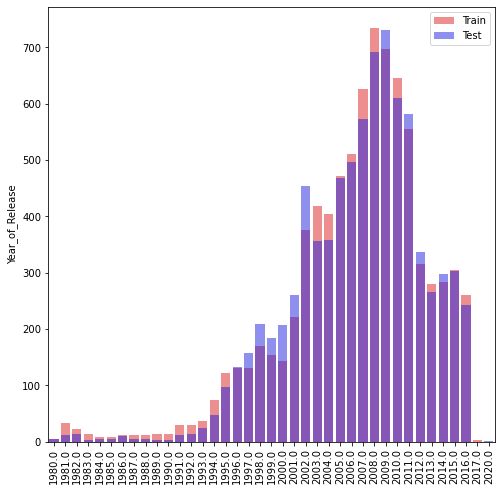

In [ ]:
plot_train_test(train_df, test_df, "Year_of_Release")

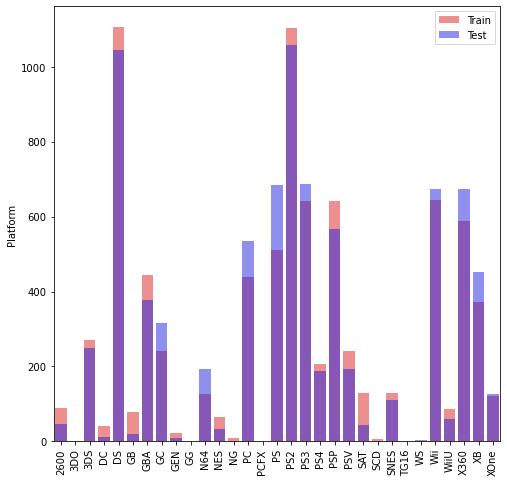

In [ ]:
plot_train_test(train_df, test_df, "Platform")

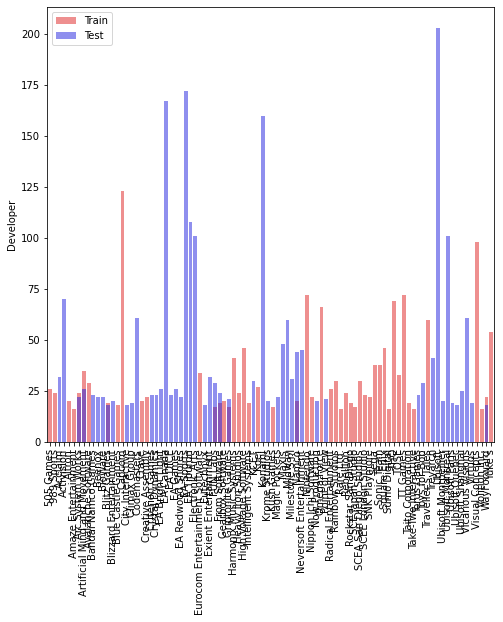

In [ ]:
plot_train_test(train_df, test_df, "Developer")

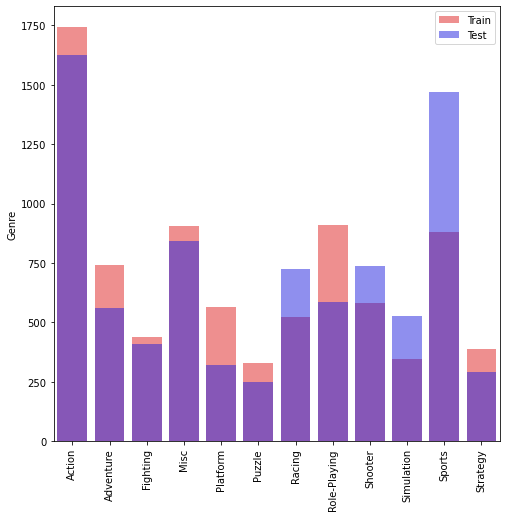

In [ ]:
plot_train_test(train_df, test_df, "Genre")